# Curve fitting 

Curve fitting is a technique to find one or a set of equations (i.e. function) that describes the trend in our data in the best way possible. For this to work, you need to have a function in mind where the parameters in that function are unknown. You can use your curve fitting knowledge for finding those parameters. An example of that is the classical calibration curve.

## Least squares

Least squares is one of the most commonly used method for fitting linear models into a set of data. Here you are aiming at minimizing the sum of distances between the measured data and the potential model. 

Let's use some data for this.

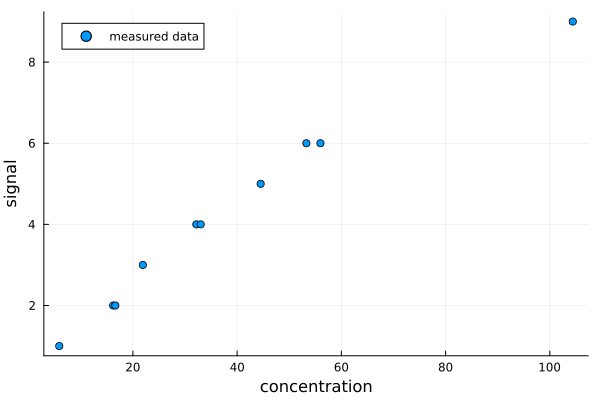

In [1]:
using DataSci4Chem

cal = [5.871	1
	   16.224	2
	   16.628	2
	   21.9	    3
	   32.172	4
	   33.006	4
	   44.512	5
	   53.285	6
 	   55.985	6
	   104.403	9]

scatter(cal[:,1],cal[:,2],label = "measured data",xlabel = "concentration",ylabel="signal")

## E1:

Let's assume we have a function such as *f(x) = ax + b* that we want to fit to our data. How many parameters do we have to define through our curve fitting?

> **Answers to E1**
> 
> We have two parameters the slope *a* and the intercept *b* that must be defined via least squares.
>

## E2: 

Let's assume we have a line with a slope of zero to best explain our data. How would such a line look?

> **Answer to E2** 
>
> We need to set the *a = 0* and select a random number between the smallest *y* and the largest *y* to simulate such a line. 

In [2]:
f(x) = a*x .+ b 

f (generic function with 1 method)

In [3]:
a = 0 
b = rand(minimum(cal[:,2]):maximum(cal[:,2]))

4.0

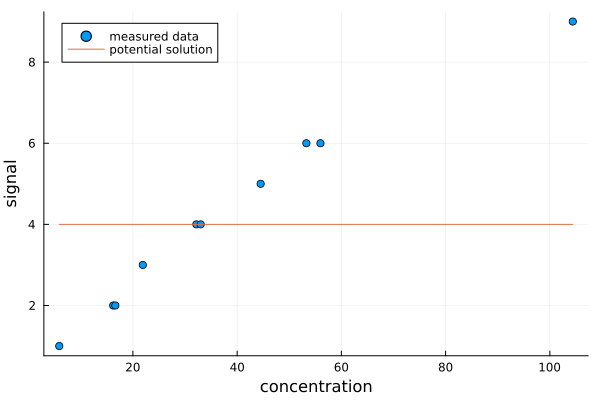

In [4]:
y_h = f(cal[:,1])

plot!(cal[:,1],y_h,label = "potential solution")

## E3: 

How can we calculate the distances between each measured and estimated data point?

In [5]:
y = cal[:,2]
d(y,y_h) = y .- y_h 

d(y,y_h)

10-element Vector{Float64}:
 -3.0
 -2.0
 -2.0
 -1.0
  0.0
  0.0
  1.0
  2.0
  2.0
  5.0

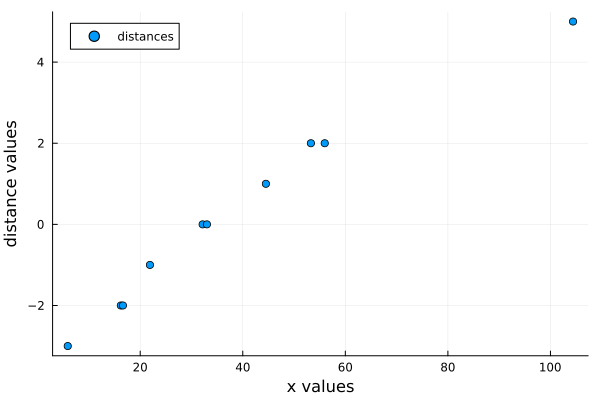

In [6]:
scatter(cal[:,1],d(y,y_h),label= "distances", xlabel = "x values", ylabel = "distance values")

## E4: 

Some of these distances are positive while others are negative. How can we remove the impact of sign on these distances?

> **Answer to E4**
>
> We can square these distances, which removes the impact of the sign on how well our model is performing.
>

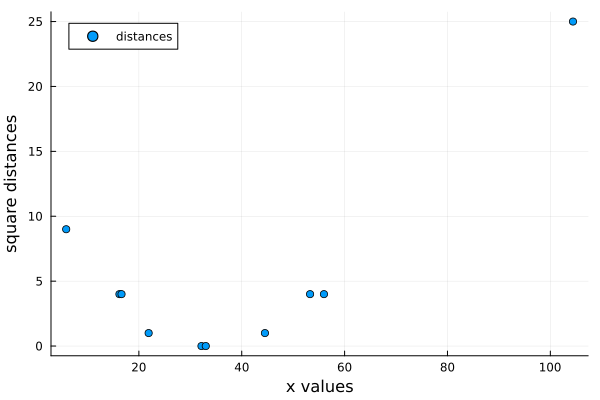

In [7]:
sd(y,y_h) = (y .- y_h).^2 

scatter(cal[:,1],sd(y,y_h),label= "distances", xlabel = "x values", ylabel = "square distances")

## E5: 

This is not very meaningful yet. How can we combine this information into one number? 

> **Answer to E5**
>
> We can sum all these squared distances to get an estimate on the potential error using this model.
>

In [8]:
ssd(y,y_h) = sum((y .- y_h).^2) 

ssqd = ssd(y,y_h)

52.0

## E6: 

Is this a good number? Are we doing ok with our model?

> **Answer to E6**
>
> We are only able to express any opinion about this once we compare this value to the same value generated by another model. Based on the observed data and the model, this is not a good model.
> 

## E7: 

How about including a slope into our model? Let's include a positive slope into our model.

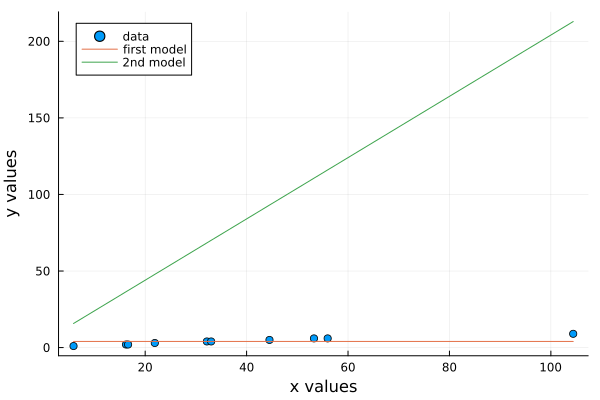

In [9]:
a = rand(0.001:3.0)
y_h1 = f(cal[:,1])

scatter(cal[:,1],y,label = "data", xlabel = "x values" , ylabel = "y values")
plot!(cal[:,1],y_h,label = "first model")
plot!(cal[:,1],y_h1,label = "2nd model")

## E8:

Is this a better model? Let's calculate the SSD for this model. 

In [10]:
ssqd1 = ssd(y,y_h1)

85551.94217643281

## E9: 

What if we do this several times? How would the SSD will look?

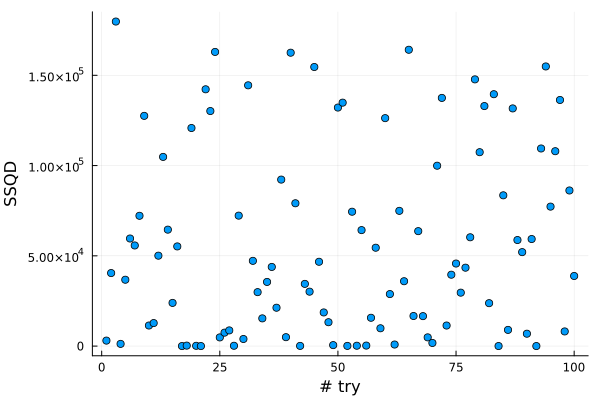

In [11]:
n = 100

ssqd_ = zeros(n)
a_ = zeros(n)
b_ = zeros(n)

for i=1:n
    a = rand(0:0.001:3.0)
    b = rand(0:minimum(cal[:,2]))
    a_[i] = a
    b_[i] = b
    tv1 = f(cal[:,1])
    ssqd_[i] = ssd(y,tv1)
end 

scatter(ssqd_,label = false,xlabel="# try", ylabel ="SSQD")


## E10: 

Is there an optimized model for these data? 

> **Answer to E10** 
>
> We can use the minimum error (i.e. SSD) to find the best potential parameters.
>

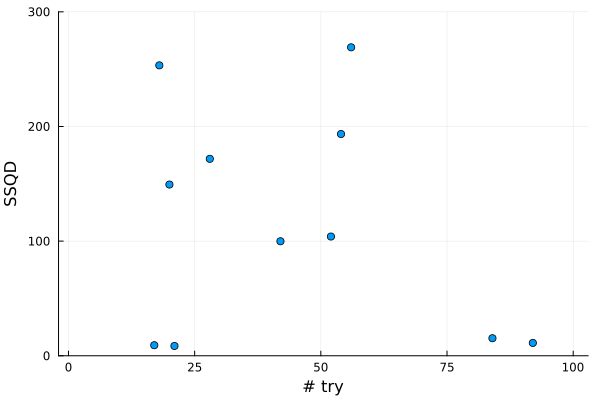

In [12]:
ylims!(0,300)

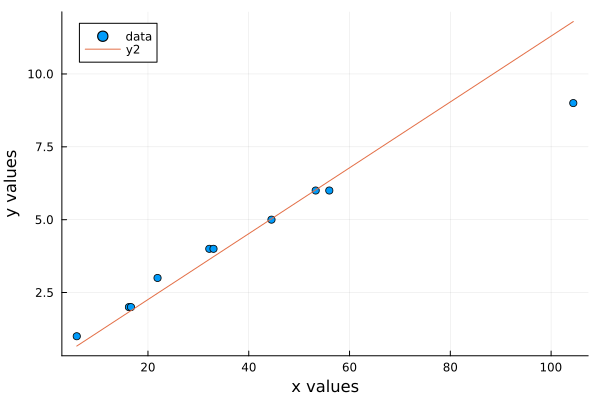

In [13]:
a = a_[argmin(ssqd_)]
b = b_[argmin(ssqd_)]

y_h1 = f(cal[:,1])

scatter(cal[:,1],y,label = "data", xlabel = "x values" , ylabel = "y values")
plot!(cal[:,1],y_h1)


## E11: 

This is not very good. Why is that?

> **Answer to E11:** 
>
> The larger number of iterations could have helped. However, given that we are treating these two parameters as independent variables, we cannot expect much from it. 
>

## E12: 

How can we solve this problem then?

> **Answer to E12** 
>
> You can remove the independency between the two variables or solve this problem as a combination of linear equations.
> 

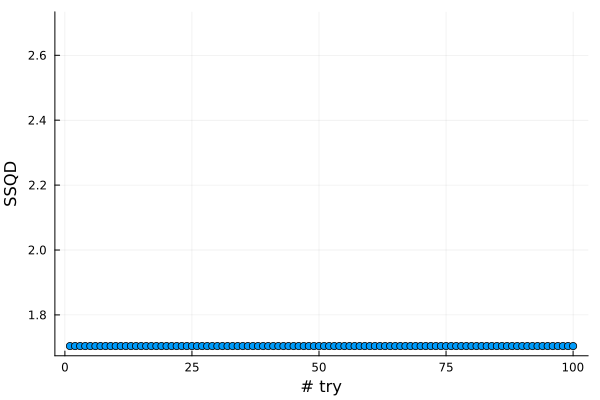

In [25]:
n = 100

ssqd_1 = zeros(n)
a_1 = zeros(n)
b_1 = zeros(n)

for i=1:n
    a = rand(0:0.001:3.0)
    b = median(y .- a.*cal[:,1])
    a_1[i] = a
    b_1[i] = b
    tv1 = f(cal[:,1])
    ssqd_1[i] = ssd(y,tv1)
end 

scatter(ssqd_1,label = false,xlabel="# try", ylabel ="SSQD")

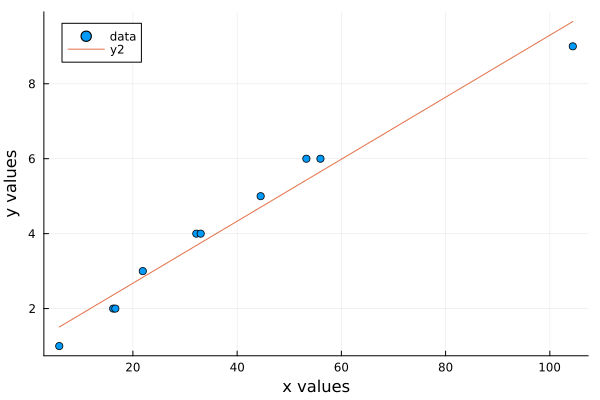

In [26]:
a = a_1[argmin(ssqd_1)]
b = b_1[argmin(ssqd_1)]

y_h1 = f(cal[:,1])

scatter(cal[:,1],y,label = "data", xlabel = "x values" , ylabel = "y values")
plot!(cal[:,1],y_h1)

> **Answer to E12** 
>
> We can look at this as a combination of linear equations and try to solve those. 
>



$y_1 = ax_1 + b$\\
$y_2 = ax_2 + b$\\
$y_3 = ax_3 + b$\\
$y_4 = ax_4 + b$

$\begin{bmatrix} y_1\\ y_2\\ y_3\\ y_4 \end{bmatrix}$ = $\begin{bmatrix} 1 & x_1\\ 1 & x_2\\ 1 & x_3\\ 1 & x_4 \end{bmatrix}$ $\times$ $\begin{bmatrix} b \\ a \end{bmatrix}$ 

## E13: 

How can we solve this problem? 

> **Answer to E13** 
>
> We can matrix operations to solve this problem. 

$\begin{bmatrix} b \\ a \end{bmatrix}$ = $(X^{T}X)^{-1}X^{T}Y$ 

In [16]:
X = cal[:,1]
Y = cal[:,2]

X1 = hcat(ones(length(X),1),X)

beta = pinv(X1'*X1)*X1' * Y

2-element Vector{Float64}:
 1.022936488854152
 0.08273904546379036

## E14: 

Can we plot this new model against the data to make sure we have a good model?

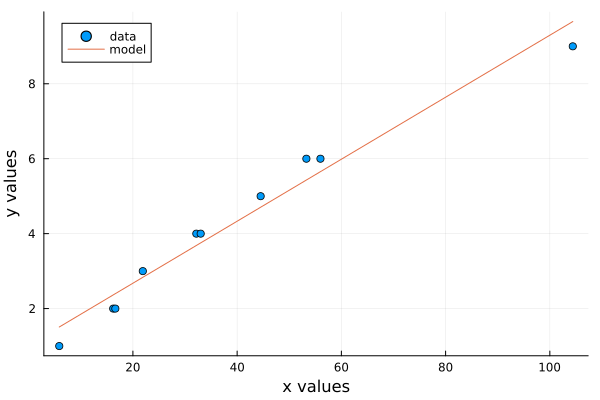

In [17]:
f(x) = beta[1] .+ beta[2].*x


scatter(X,Y,label="data",xlabel="x values",ylabel="y values")
plot!(X,f(X),label="model")

## E15: 

This looks good. How can you quantitatively assess whether this is a good fit or not?  

> **Answer to E15** 
>
> One of the most common ways of assessing the goodness of fit is using the [coefficient of determination (i.e. R2)](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - f(x_i))^2}{\sum_{i=1}^{n} (y_i - \bar y)^2}$ 

## E16: 

Can you calculate the R2 for your fit? 

In [18]:
res = Y .- f(X)
res_t = Y .- mean(Y)
R2 = 1 - sum(res.^2)/sum(res_t.^2)

0.9669769968268943

## E17: 

Can we make a function to calculate the R2 for a given model?

In [19]:
function r2(y_,y_h_)
    res = y_ .- y_h_
    res_t = y_ .- mean(y_)
    R2 = 1 - sum(res.^2)/sum(res_t.^2)

    return R2
end 

r_2 = r2(Y,f(X))

0.9669769968268943

## E18: 

What if we want to fit a non-linear (e.g. Gaussian) function to our data?

$g(x) = \frac{1}{\sigma \sqrt{2 \pi}}exp{(\frac{-(x - \mu)^2}{2 \sigma^2})}$

> **Answer to E18** 
>
> You can either linearize this model or you can use non-linear fit. For non-linear fit you can take advantage of the functions *model(-)* and *curve_fit(-)*. 

## E19: 

Can we use the curve fit to fit a linear model to our data? 

In [20]:
model(x,p) = p[1] .* x .+ p[2]

p0 = [0.5, 0.5]

fit = curve_fit(model, X, Y, p0)
fit.param

2-element Vector{Float64}:
 0.08273904546404943
 1.022936488844917

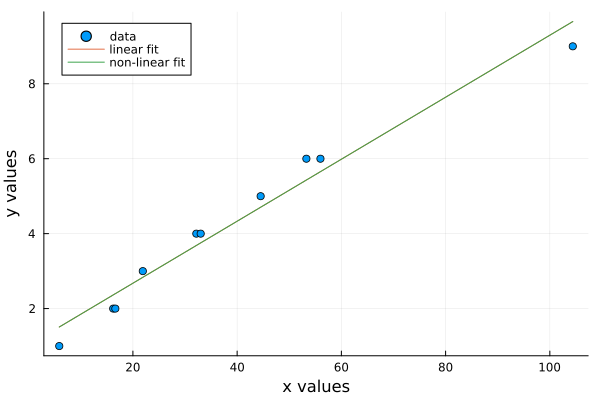

In [21]:
fh2(x) = fit.param[1] .* x .+ fit.param[2]

scatter(X,Y,label="data",xlabel="x values", ylabel="y values")
plot!(X,f(X),label="linear fit")
plot!(X,fh2(X),label = "non-linear fit")

## E20: 

Is there any systematic error in your model?

> **Answer to E20** 
>
> To assess that, you can look at the distribution of residuals against the *X* which should give you a random distribution. 

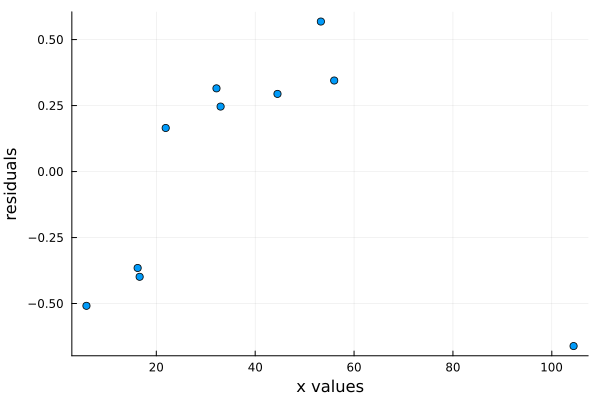

In [22]:
scatter(X,res,label=false,xlabel="x values", ylabel = "residuals")

## E21: 

You can see that there is a clear trend in your residuals. What does this mean and how can you overcome this?

> **Answer to E21** 
>
> The trend in the residuals shows that you need to fit a second order model to your data.

In [23]:
model2(x,p1) = (p1[1] .* x.^2) .+ (p1[2] .* x) .+ p1[3]

p1 =[-1.0,0.0,0.0]

fit2 = curve_fit(model2, X, Y, p1)

fit2.param

y_h2 = model2(X,fit2.param)

r2_2 = r2(Y,y_h2)


0.9969191334072705

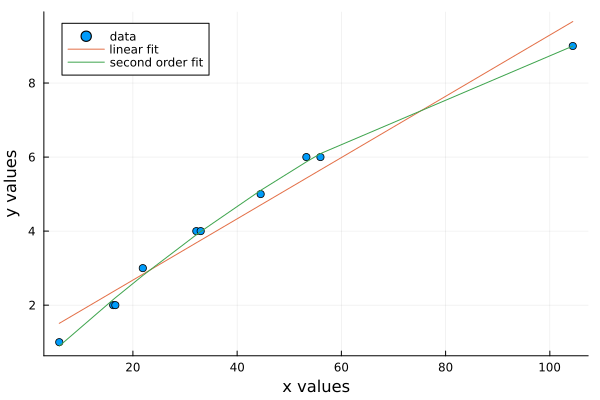

In [24]:
scatter(X,Y,label="data",xlabel="x values", ylabel="y values")
plot!(X,f(X),label="linear fit")
plot!(X,y_h2,label="second order fit")

## E22: 

You can see that you clearly have a better fit with the second order model. Which model is better here?

> **Answer to E22**
>
> There are different tests to assess the significance of the added parameters in your model one of them being the [f-test](https://en.wikipedia.org/wiki/F-test).

## E23: 

Try to fit a gaussian model to the data from your mini project.